## 基因演算法練習
- 目標式：y = 10 * sin(5a) + 7 * cos(4b)
- 求最大值

In [14]:
# import 套件
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
class Gene:
    
    # 隨機產生基因染色體：隨機產生 pop_size 組，維度為 pop_dim，長度為 chrom_length 的染色體。
    # 每個染色體皆是0或是1，長度越長代表細分程度越高。
    def geneEncoding(pop_size, pop_dim, chromosome_length):   
        pop = []
        if pop_dim == 1:
            for i in range(pop_size):            
                temp = []
                for j in range(chromosome_length):
                    temp.append(random.randint(0, 1))
                pop.append(temp)
            return pop        
        elif pop_dim > 1:
            for i in range(pop_size):
                dim = []
                for j in range(pop_dim):
                    temp = []
                    for k in range(chromosome_length):
                        temp.append(random.randint(0, 1))
                    dim.append(temp)
                pop.append(dim)
            return pop
        elif pop_dim < 1:
            print('維度必須是大於零的整數！')
    
    # 二進制編碼轉回十進制數值，並將結果數值區間轉換回 max 與 min 之間
    # 將十位的二進制編碼轉換為十進制，結果有 2 的 n 次方個。（n 是染色體長度）
    def decodechromosome(pop, max_value, min_value):
        if len(np.array(pop).shape) == 2:
            pop_count = np.array(pop).shape[0]
            pop_len = np.array(pop).shape[1]
            temp = []
            for i in range(pop_count):
                t = 0
                for j in range(pop_len):
                    t += pop[i][j] * (math.pow(2, j))   # math.pow(x,n) 表示 x 的 n 次方
                t = t * (max_value[0] - min_value[0]) / (math.pow(2, pop_len) - 1) + min_value[0]
                temp.append(t)            
            return temp
        elif len(np.array(pop).shape) == 3:
            pop_count = np.array(pop).shape[0]
            pop_dim = np.array(pop).shape[1]
            pop_len = np.array(pop).shape[2]
            temp = []            
            for i in range(pop_count):
                dim = []
                for j in range(pop_dim):
                    t = 0
                    for k in range(pop_len):
                        t += pop[i][j][k] * (math.pow(2, k))   # math.pow(x,n) 表示 x 的 n 次方
                    t = t * (max_value[j] - min_value[j]) / (math.pow(2, pop_len) - 1 ) + min_value[j]
                    dim.append(t)
                temp.append(dim)
            return temp
          
    # 如果求最大值的問題，可以在這裡先淘汰負值
    # 不一定需要用
    def calfitValue(obj_value):  
        fit_value = []
        c_min = 0
        for i in range(len(obj_value)):
            if(obj_value[i] + c_min > 0):
                temp = c_min + obj_value[i]
            else:
                temp = 0.0
            fit_value.append(temp)
        return fit_value
    
    # 計算 fitness 總和
    def fit_sum(fit_value):    
        total = 0
        for i in range(len(fit_value)):
            total += fit_value[i]
        return total
    
    # 計算累進機率
    def cumsum(fit_value):
        for i in range(len(fit_value)-2, -1, -1):  # 從倒數第二個開始倒數到第0個
            t = 0
            j = 0
            while(j <= i):
                t += fit_value[j]
                j += 1
            fit_value[i] = t
        fit_value[len(fit_value)-1] = 1 # 最後一個值填1
        return fit_value
            
    # 輪盤選擇法
    def selection(pop, fit_value, target):
        #print('期望：' + target)
        if target == 'max':
            for i in range(len(fit_value)):
                fit_value[i] = fit_value[i] - min(fit_value) + 0.001
            #print('轉換結果：\n' + str(fit_value))
        elif target == 'min': # 如果是望小的話會將結果進行倒數處理，分母會固定加上一個 0.001 避免分母為 0
            for i in range(len(fit_value)):
                fit_value[i] = 1 / ((fit_value[i] - min(fit_value))  + 0.001)
            #print('轉換結果：\n' + str(fit_value))
        newfit_value = []
        total_fit = Gene.fit_sum(fit_value)
        #print('適應度總和：' + str(total_fit))
        for i in range(len(fit_value)):
            newfit_value.append(fit_value[i] / total_fit) # 把Ｙ全部除以Ｙ總和，得到個體適應機率    
        Gene.cumsum(newfit_value)  # 把個體適應機率丟進 cumsum 計算累進個體適應機率
        #print('累進個體適應機率：\n' + str(newfit_value))
        ms = []
        pop_len = len(pop)
        for i in range(pop_len):
            ms.append(random.random()) # 隨機產生 pop_len 組的 0~1 數值
        ms.sort() # 由小到大排列
        #print('隨機累進機率：\n' + str(ms))
        fitin = 0
        newin = 0
        newpop = pop
    
        # 輪盤選擇法的迴圈（挑選和複製）
        while newin < pop_len:
            if ms[newin] < newfit_value[fitin]:
                newpop[newin] = pop[fitin]
                newin = newin + 1
            else:
                fitin = fitin + 1
        return newpop
        
    # 交配，隨機的機率將 pop[i] 與 pop[i+1] 內的隨機位置進行交換
    def crossover(pop, pc):
        if len(np.array(pop).shape) == 2:
            mem = []
            pop_count = np.array(pop).shape[0]
            pop_len = np.array(pop).shape[1]
            for i in range(pop_count - 1):
                if random.random() < pc:
                    cpoint = random.randint(0,pop_len)
                    temp1 = []
                    temp2 = []
                    temp1.extend(pop[i][0:cpoint])
                    temp1.extend(pop[i+1][cpoint:pop_len])
                    temp2.extend(pop[i+1][0:cpoint])
                    temp2.extend(pop[i][cpoint:pop_len])
                    pop[i] = temp1
                    pop[i+1] = temp2
            return pop
        if len(np.array(pop).shape) == 3:
            pop_count = np.array(pop).shape[0]
            pop_dim = np.array(pop).shape[1]
            pop_len = np.array(pop).shape[2]
            for i in range(pop_count - 1):
                if random.random() < pc:               
                    for j in range(pop_dim):
                        cpoint = random.randint(0, pop_len)   
                        temp1 = []
                        temp2 = []
                        temp1.extend(pop[i][j][0: cpoint])
                        temp1.extend(pop[i+1][j][cpoint: pop_len])
                        temp2.extend(pop[i+1][j][0: cpoint])
                        temp2.extend(pop[i][j][cpoint: pop_len])
                        pop[i][j] = temp1
                        pop[i+1][j] = temp2                   
            return pop
                            
    # 突變，隨機機率將其中一個值的0改1，或是1改0
    def mutation(pop, pm):
        if len(np.array(pop).shape) == 2:
            pop_count = np.array(pop).shape[0]
            pop_len = np.array(pop).shape[1]
            for i in range(pop_count):
                if random.random() < pm:
                    mpoint = random.randint(0, pop_len-1)
                    if pop[i][mpoint] == 1:
                        pop[i][mpoint] = 0
                    else:
                        pop[i][mpoint] = 1
            return pop
        if len(np.array(pop).shape) == 3:
            pop_count = np.array(pop).shape[0]
            pop_dim = np.array(pop).shape[1]
            pop_len = np.array(pop).shape[2]
            for i in range(pop_count):
                if random.random() < pm:
                    for j in range(pop_dim):
                        mpoint = random.randint(0, pop_len-1)
                        if pop[i][j][mpoint] == 1:
                            pop[i][j][mpoint] = 0
                        else:
                            pop[i][j][mpoint] = 1
            return pop
    
    # 找出最佳解與基因組合的位置，並儲存。
    def find_best(fit_value, pop, target):
        count = -1
        if target == 'max':
            Best = -99999999
            for i in range(len(fit_value)):
                if Best < fit_value[i]:
                    Best = fit_value[i]
                    count = i
            if len(BestValue) == 0:
                BestValue.append(fit_value[i])
                BestGene.append(pop[i])
            else:
                if BestValue[len(BestValue) - 1] < fit_value[i]:
                    BestValue.append(fit_value[i])
                    BestGene.append(pop[i])
                else:
                    BestValue.append(BestValue[len(BestValue) - 1])
                    BestGene.append(BestGene[len(BestGene) - 1])           
        elif target == 'min':
            Best = 99999999
            for i in range(len(fit_value)):
                if Best > fit_value[i]:
                    Best = fit_value[i]
                    count = i
            if len(BestValue) == 0:
                BestValue.append(fit_value[i])
                BestGene.append(pop[i])
            else:
                if BestValue[len(BestValue) - 1] > fit_value[i]:
                    BestValue.append(fit_value[i])
                    BestGene.append(pop[i])
                else:
                    BestValue.append(BestValue[len(BestValue) - 1])
                    BestGene.append(BestGene[len(BestGene) - 1])
                    

In [50]:
# 在這裡定義目標式，這裡是範例：
# y = 10 * math.sin(5 * a) + 7 * math.cos(4 * b)
def calobjValue(pop):   
    obj_value = []
    for i in range(len(pop)):
        obj_value.append(10 * math.sin(5 * pop[i][0]) + 7 * math.cos(4 * pop[i][1]))
        #obj_value.append(1 * pop[i][0] + 1 * pop[i][1]))
    return obj_value

In [51]:
# 這邊是設定參數

loop_times = 500 # 迭代次數
pop_size = 500 # 基因組數
pop_dim = 2 # 每組基因數量，對應input的變數數量。

# ----- 每個基因最大最小值定義---------
max_value = []  # 基因中允許出現的最大值
min_value = []  # 基因中允許出現的最小值

# 第一個基因
max_value.append(3)
min_value.append(2)

# 第二個
max_value.append(1)
min_value.append(0)

# 第三個
max_value.append(0)
min_value.append(0)

# 超過自行複製
# ---------------------------------

chromosome_length = 10 # 染色體長度，越大代表細分程度越高，也代表要跑越久（細分程度 = 2^chromosome_length）
target = 'max' # 期望目標，望大還是望小
pc = 0.6 # 交配機率，設 0 的話代表不進行交配
pm = 0.01 # 變異機率，設 0 的話代表不進行突變
BestValue = []  # 儲存最佳解
BestGene = []  # 儲存最佳基因

Best Gene : [[1, 1, 0, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 0, 1, 0, 0, 0]]
Best Input : [[2.104594330400782, 0.09286412512218964]]
Best Value : 16.903381367966688


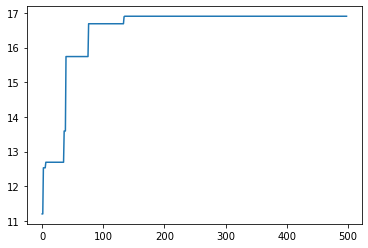

In [52]:
# 基因演算法找最佳解，這邊可以不用改

pop = Gene.geneEncoding(pop_size, pop_dim, chromosome_length)

for i in range(loop_times):

    source_value = Gene.decodechromosome(pop.copy(), max_value, min_value)
    fit_value = calobjValue(source_value.copy())
    Gene.find_best(fit_value, pop, target)
    #fit_value = Gene.calfitValue(fit_value.copy())  # 淘汰（負值填 0，不一定需要執行）
    newpop = Gene.selection(pop, fit_value.copy(), target)  # 通過輪盤選擇法進行挑選與複製
    final_pop = Gene.mutation(Gene.crossover(newpop.copy(), pc), pm)
    pop = final_pop.copy()
    
print('Best Gene : ' + str(BestGene[len(BestGene) - 1]))
print('Best Input : ' + str(Gene.decodechromosome([BestGene[len(BestGene) - 1]], max_value, min_value)))
print('Best Value : ' + str(BestValue[len(BestValue) - 1]))
plt.plot(BestValue[1:])
plt.show()

In [44]:
fit_value

[3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216827337,
 3.5621864216

In [45]:
obj_value

NameError: name 'obj_value' is not defined